# Lab 08 - Logistic Regression Lab Enhancement

## Introduction

## Dataset

The data preprocessing involves handling missing values, encoding categorical variables, and standardizing features. Initially, any rows with missing values are being dropped to ensure data completeness. Categorical variables, such as 'Customer Type', 'Type of Travel', and 'Class', are being converted into numerical format using one-hot encoding, facilitating their use in the logistic regression model. Subsequently, the dataset is split into training and testing sets, with 80% of the data allocated for training and 20% for testing. Finally, standardizing the features is performed to normalize the data, ensuring all features contribute equally to the model training process. This comprehensive preprocessing prepares the dataset for effective logistic regression modeling, enhancing the accuracy and reliability of the predictions.

The dataset provides insights into customer satisfaction levels within an undisclosed airline company. While the specific airline name is withheld, the dataset is rich in information, containing 22 columns and 129,880 rows. It aims to predict whether future customers will be satisfied based on various parameters included in the dataset.

The columns likely cover a range of factors that influence customer satisfaction, such as flight punctuality, service quality, and so. By analyzing this dataset, airlines can gain valuable insights into the factors that contribute to customer satisfaction and tailor their services accordingly to enhance the overall customer experience.

Source: https://www.kaggle.com/datasets/raminhuseyn/airline-customer-satisfaction

#### Data Preprocessing

Preprocessing is a crucial step in preparing the data for modeling. It involves handling missing values, encoding categorical variables, and standardizing the features. The following steps outline the detailed preprocessing procedures applied to the Airplane Customer Satisfaction dataset.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Airline_customer_satisfaction.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Print initial data shape
print("\nInitial data shape:", data.shape)

First few rows of the dataset:
  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location            ...             Online support  \
0               0              2            ...                    

#### Handling Missing Values

Missing values can lead to inaccuracies in model training. Hence, they need to be addressed appropriately. Here, any rows with missing values are being dropped.

In [112]:
# Step 1: Handling Missing Values
# Drop rows with missing values
data = data.dropna()
print("\nData shape after dropping missing values:", data.shape)


Data shape after dropping missing values: (129487, 22)


#### Encoding Categorical Variables

Machine learning models, such as logistic regression, require numerical input. Therefore, categorical variables must be converted into numerical representations using one-hot encoding. This process creates binary columns for each category, excluding the first category to avoid multicollinearity.

In [113]:
# Step 2: Encoding Categorical Variables
# Encode categorical variables
data = pd.get_dummies(data, columns=['Customer Type', 'Type of Travel', 'Class'], drop_first=True)
print("\nData after encoding categorical variables:")
print(data.head())


Data after encoding categorical variables:
  satisfaction  Age  Flight Distance  Seat comfort  \
0    satisfied   65              265             0   
1    satisfied   47             2464             0   
2    satisfied   15             2138             0   
3    satisfied   60              623             0   
4    satisfied   70              354             0   

   Departure/Arrival time convenient  Food and drink  Gate location  \
0                                  0               0              2   
1                                  0               0              3   
2                                  0               0              3   
3                                  0               0              3   
4                                  0               0              3   

   Inflight wifi service  Inflight entertainment  Online support  \
0                      2                       4               2   
1                      0                       2               2   


#### Defining Features and Target Variable

The features (X) are the independent variables used to predict the target (y), which in this case is customer satisfaction. The target variable 'satisfaction' is binary encoded: 'satisfied' is mapped to 1 and 'neutral or dissatisfied' is mapped to 0.

In [114]:
# Step 3: Defining Features and Target Variable
# Define features (X) and target (y)
X = data.drop(['satisfaction'], axis=1)
y = data['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)  # Binary encoding for logistic regression

# Print feature and target shapes
print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (129487, 22)
Target vector shape: (129487,)


#### Splitting The Data

The dataset is split into training and testing sets to evaluate the model's performance on unseen data. 80% of the data is used for training, and 20% is used for testing.

In [115]:
# Step 4: Splitting the Data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (103589, 22) (103589,)
Testing set shape (X_test, y_test): (25898, 22) (25898,)


#### Standardizing The Features

Standardization is applied to the features to normalize the data. This ensures that all features contribute equally to the model training, preventing any single feature from dominating due to its scale.

In [116]:
# Step 5: Standardizing the Features
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print a few rows of the standardized features
print("\nFirst few rows of standardized training features:")
print(pd.DataFrame(X_train, columns=X.columns).head())


First few rows of standardized training features:
        Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0 -1.219039         0.209045      0.832696                           0.663199   
1  1.227453        -0.424519     -0.604126                          -0.647185   
2  0.103390        -1.547390     -1.322536                          -1.302377   
3 -0.954553         0.362075     -0.604126                          -0.647185   
4  0.103390         0.105725      0.114285                           0.008007   

   Food and drink  Gate location  Inflight wifi service  \
0        0.794826       0.006767               1.328983   
1        0.101786      -0.758555               1.328983   
2       -1.284294      -1.523878              -1.707650   
3       -0.591254       0.772090              -0.948492   
4        0.101786       0.006767              -1.707650   

   Inflight entertainment  Online support  Ease of Online booking  \
0                0.456495        0.367

## Data Visualization

Data visualization is performed to gain insights into the Airplane Customer Satisfaction dataset. The distribution of customer satisfaction is being visualized using a count plot, highlighting the proportion of satisfied versus dissatisfied customers. The age distribution is being analyzed by plotting histograms for satisfied and dissatisfied customers, revealing any age-related patterns in satisfaction. The distribution of flight distances is being visualized similarly to understand its impact on satisfaction. A correlation heatmap is being generated to identify the relationships between various features, aiding in feature selection and understanding multicollinearity. Box plots for various service-related features are being created to compare their distributions between satisfied and dissatisfied customers. These visualizations provide a comprehensive understanding of the dataset, enabling better preparation for the logistic regression modeling process.

#### Distribution of Customer Satisfaction

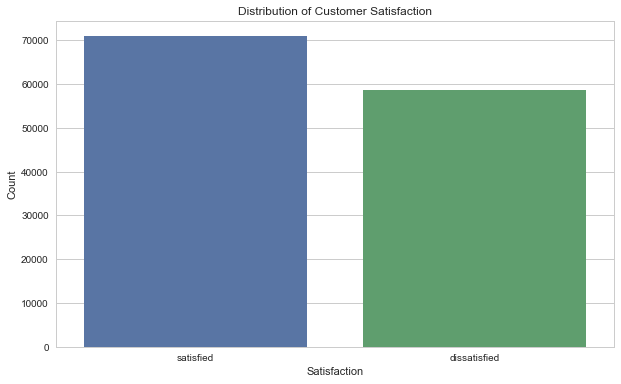

In [117]:
# Set the background to white and increase figure size
sns.set(style="whitegrid")

# Plotting distribution of the target variable (satisfaction)
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', data=data)
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

#### Age Distribution by Customer Satisfaction

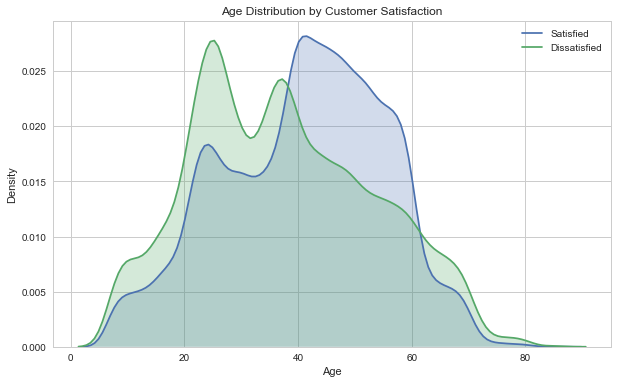

In [118]:
# Set the background to white and increase figure size
sns.set(style="whitegrid")

# Plotting the age distribution for satisfied and dissatisfied customers using kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['satisfaction'] == 'satisfied']['Age'], label='Satisfied', shade=True)
sns.kdeplot(data[data['satisfaction'] == 'dissatisfied']['Age'], label='Dissatisfied', shade=True)
plt.title('Age Distribution by Customer Satisfaction')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Flight Distance Distribution by Customer Satisfaction

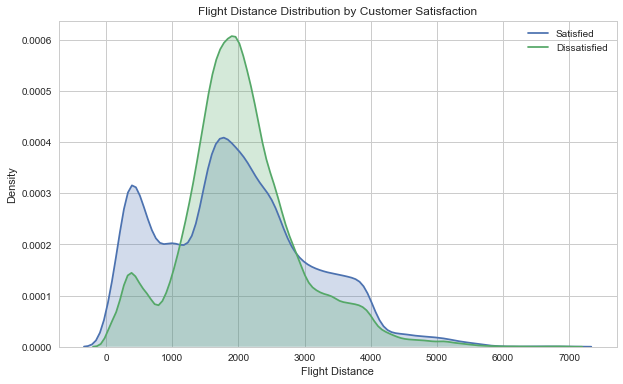

In [119]:
# Set the background to white and increase figure size
sns.set(style="whitegrid")

# Plotting the distribution of flight distance using kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['satisfaction'] == 'satisfied']['Flight Distance'], label='Satisfied', shade=True)
sns.kdeplot(data[data['satisfaction'] == 'dissatisfied']['Flight Distance'], label='Dissatisfied', shade=True)
plt.title('Flight Distance Distribution by Customer Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Correlation Matrix

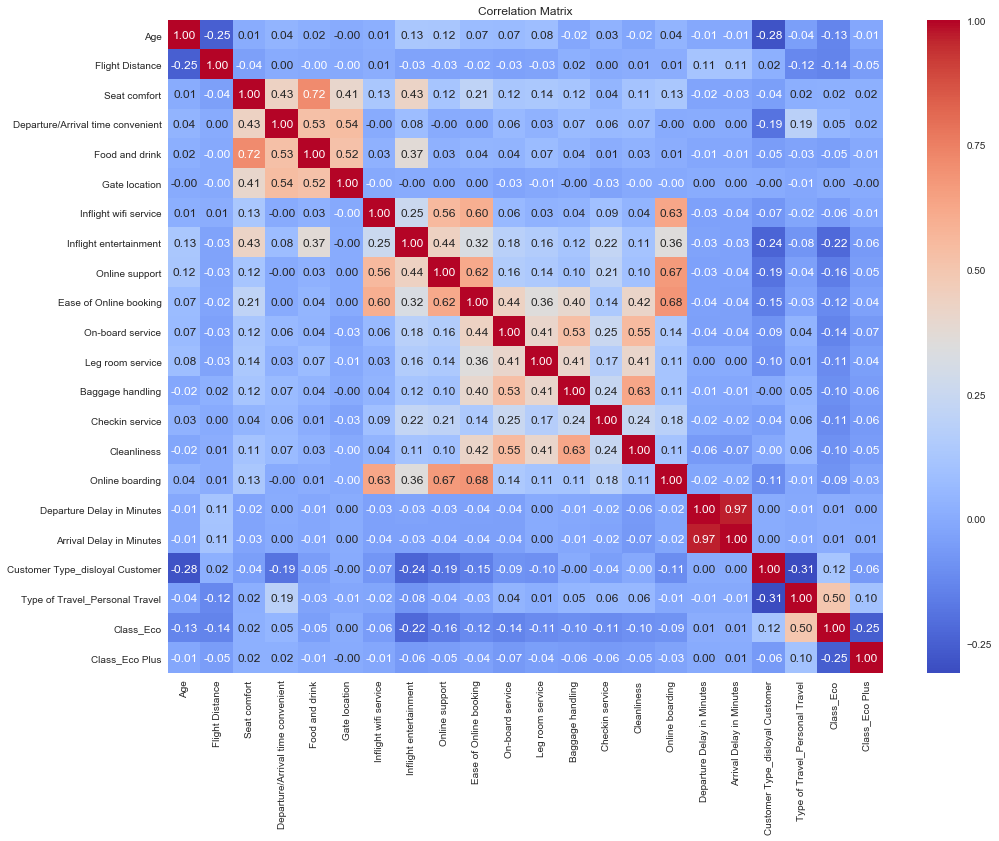

In [120]:
# Set the background to white and increase figure size
sns.set(style="whitegrid")

# Plotting a heatmap of the correlations between features
plt.figure(figsize=(16, 12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Box Plots for Various Services by Customer Satisfaction

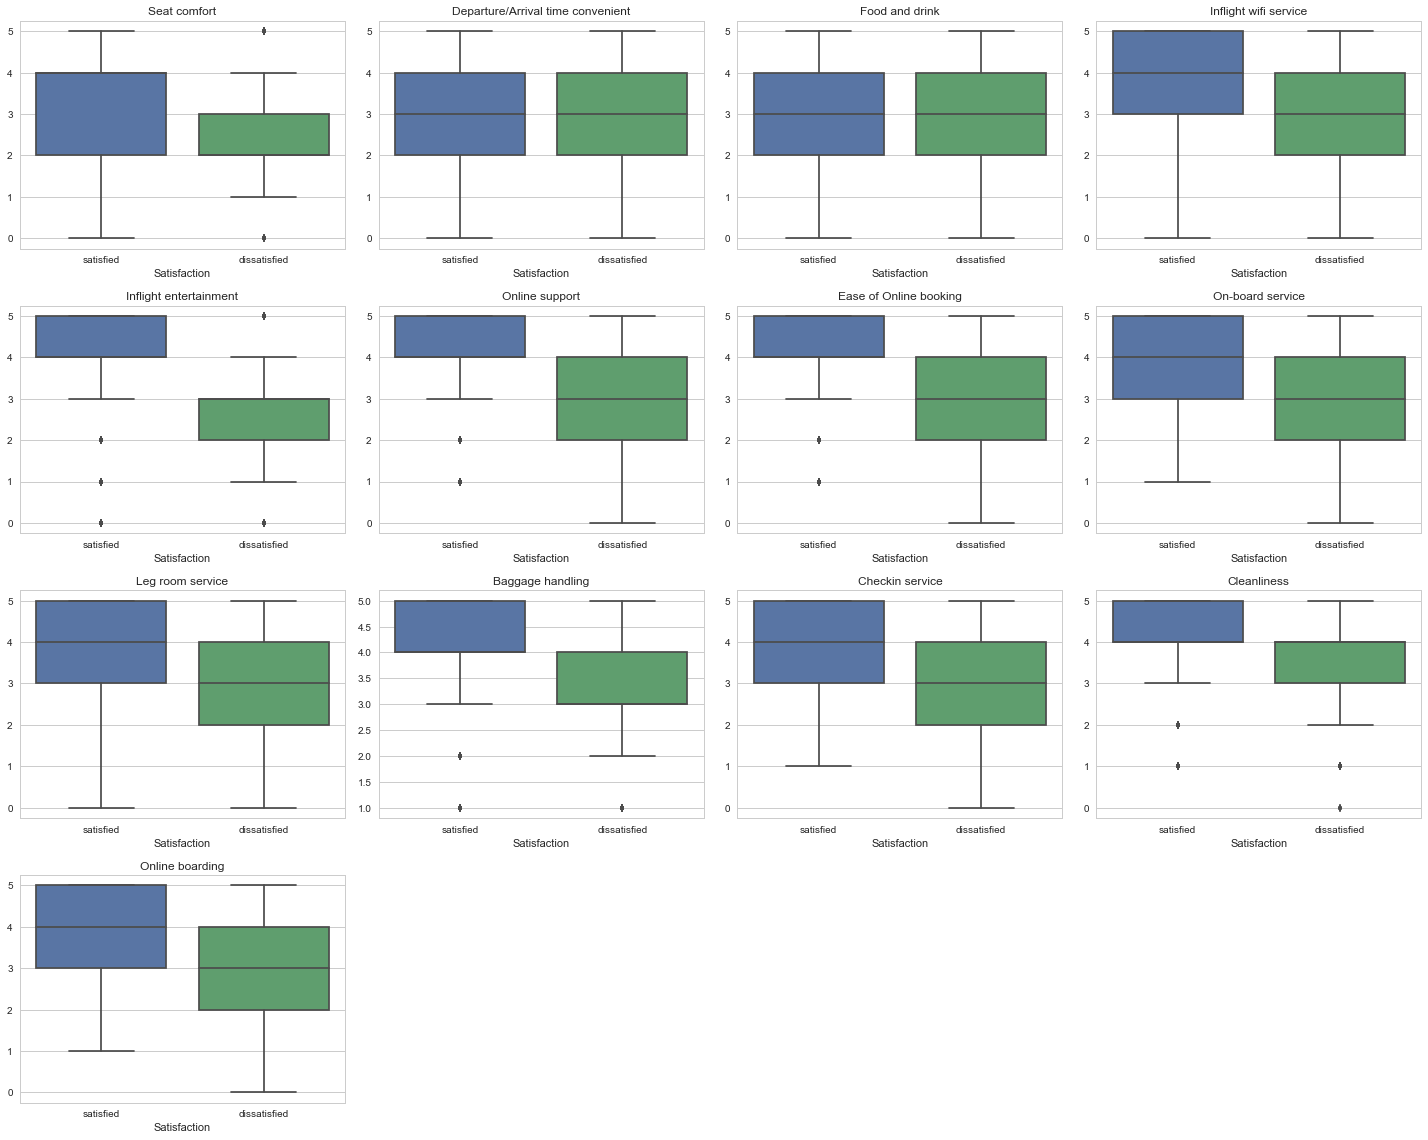

In [121]:
# Set the background to white and increase figure size
sns.set(style="whitegrid")

# Box plots for various services by customer satisfaction
service_columns = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Inflight wifi service', 
                   'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 
                   'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

plt.figure(figsize=(20, 16))
for i, column in enumerate(service_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='satisfaction', y=column, data=data)
    plt.title(column)
    plt.xlabel('Satisfaction')
    plt.ylabel('')
plt.tight_layout()
plt.show()

## Logistic Regression Model

#### Building The Logistic Regression Model

The logistic regression model is built to predict customer satisfaction based on the features extracted from the Airplane Customer Satisfaction dataset. The model is trained using the training set and evaluated on the testing set to assess its performance. Accuracy metrics, classification reports, and confusion matrices are generated to provide a comprehensive understanding of the model's predictive capability. Visual aids such as ROC curves and precision-recall curves will be utilized to illustrate the model's performance graphically.

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predicting on the testing data
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy of the logistic regression model: 0.83

Classification Report:
             precision    recall  f1-score   support

          0       0.81      0.81      0.81     11821
          1       0.84      0.84      0.84     14077

avg / total       0.83      0.83      0.83     25898


Confusion Matrix:
[[ 9590  2231]
 [ 2187 11890]]


#### Visualizing Model Performance

The performance of the logistic regression model is visualized using ROC curves and precision-recall curves. These curves provide insights into the model's ability to discriminate between satisfied and dissatisfied customers. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity), with the area under the curve (AUC) indicating the model's overall performance. The precision-recall curve illustrates the trade-off between precision and recall, offering another perspective on model performance, especially in imbalanced datasets. These visualizations complement the numerical metrics provided earlier, enhancing the understanding of how well the logistic regression model predicts customer satisfaction.

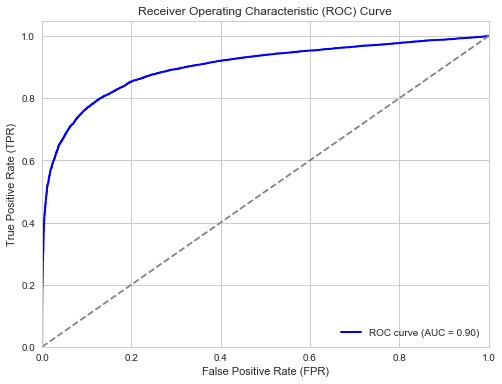

In [124]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Calculate ROC curve and AUC
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

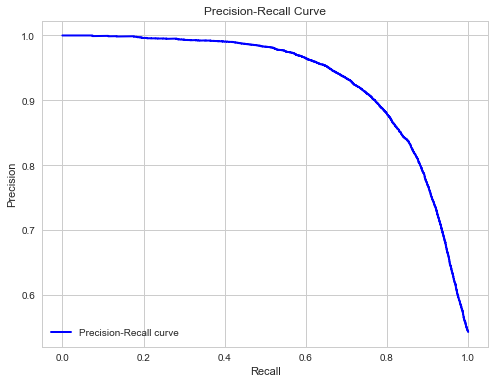

In [125]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

## Feature Importance Analysis

#### Computing Feature Importance

The feature importance analysis reveals the relative significance of each feature in predicting customer satisfaction using logistic regression. Features such as seat comfort, inflight entertainment, and cleanliness are among the most influential factors, positively or negatively impacting the model's predictions. This analysis assists in prioritizing areas of improvement or focus for enhancing customer satisfaction based on empirical data-driven insights.

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting feature importance from the logistic regression model
feature_importance = logreg.coef_[0]
features = X.columns

# Sorting feature importance in descending order
indices = np.argsort(np.abs(feature_importance))
sorted_features = features[indices]
sorted_importance = feature_importance[indices]

#### Visualizing Feature Importance

The bar chart visually represents the magnitude and direction of each feature's impact on the logistic regression model. Features with larger bars indicate higher importance, either positively or negatively, while features with smaller bars have less influence on the model's predictions. This graphical representation aids stakeholders in understanding which aspects of service provision are most critical for improving overall customer satisfaction.

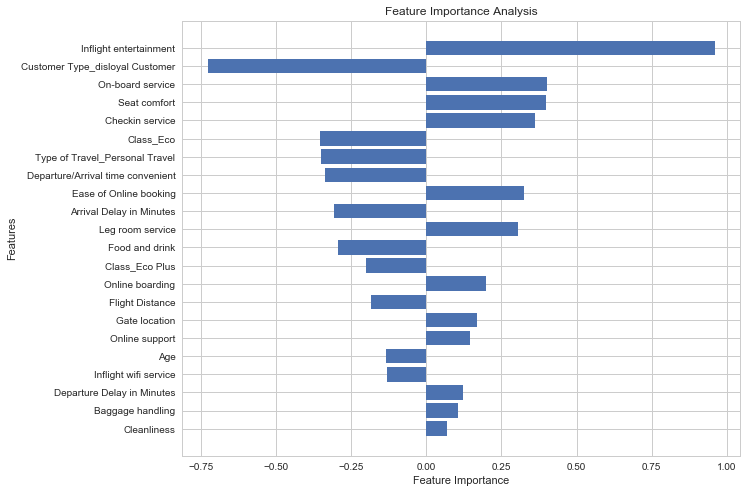

In [127]:
# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.grid(True)
plt.show()


## Advanced Visualization

Advanced visualization techniques are utilized to illustrate the distribution of predicted probabilities for customer satisfaction outcomes based on logistic regression modeling. The histogram with kernel density estimation showcases how the model predicts satisfaction levels across the dataset. This visual representation helps in understanding the model's confidence in its predictions and the variability in satisfaction outcomes.

The histogram with KDE overlays differentiates between satisfied and dissatisfied customers based on their predicted probabilities. It visually captures the model's discriminative ability and calibration in forecasting customer satisfaction levels. Stakeholders can use this visualization to assess the model's performance across various probability thresholds and refine decision-making strategies to enhance customer service and satisfaction.

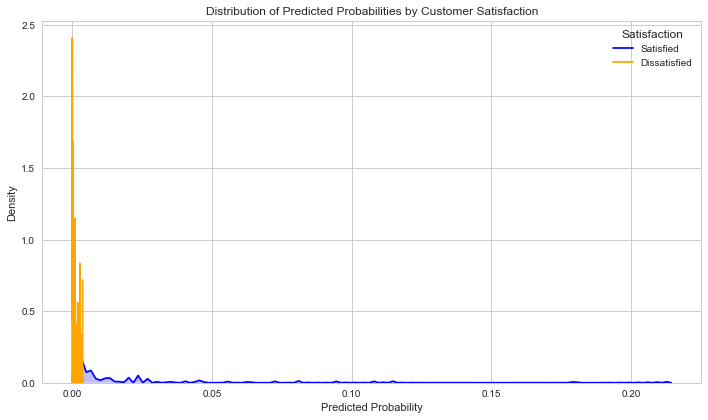

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting probabilities for the entire dataset
y_pred_proba = logreg.predict_proba(X)[:, 1]

# Separate data into satisfied and dissatisfied groups
satisfied = y_pred_proba[data['satisfaction'] == 'satisfied']
dissatisfied = y_pred_proba[data['satisfaction'] == 'dissatisfied']

# Plotting predicted probabilities against actual satisfaction
plt.figure(figsize=(10, 6))

# Plot KDE plots separately
sns.kdeplot(satisfied, color='blue', label='Satisfied', shade=True)
sns.kdeplot(dissatisfied, color='orange', label='Dissatisfied', shade=True)

plt.title('Distribution of Predicted Probabilities by Customer Satisfaction')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend(title='Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Using PCA for Dimensionality Reduction

In the visualization stage, Principal Component Analysis (PCA) was employed to reduce the dimensionality of the feature space to two principal components, capturing the variance in the data effectively. A logistic regression model was then trained on the reduced 2D dataset to predict customer satisfaction based on these components. The resulting decision boundary plot illustrates how the model delineates between satisfied and dissatisfied customers in this transformed space, facilitating a clearer understanding of the model's classification capabilities.

To gain deeper insights into the distribution and separability of customer satisfaction data, Principal Component Analysis (PCA) is employed to reduce the high-dimensional feature space to a lower-dimensional space suitable for visualization. PCA transforms the original features into a set of orthogonal components that capture the maximum variance in the data.

In [147]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

#### Training a Logistic Regression Model on Reduced Data

Following dimensionality reduction, a new logistic regression model is trained using the transformed 2D data. This model serves to predict customer satisfaction based on the reduced feature space derived from PCA.

In [148]:
from sklearn.linear_model import LogisticRegression

# Train a new model on the reduced data
model_2d = LogisticRegression(solver='liblinear', random_state=42)
model_2d.fit(X_train_2d, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Plotting the Decision Boundary

The decision boundary of the logistic regression model in the reduced 2D space is visualized to illustrate how the model distinguishes between satisfied and dissatisfied customers. This plot overlays the decision regions (areas where the model predicts different classes) on the scatter plot of PCA-transformed data points.

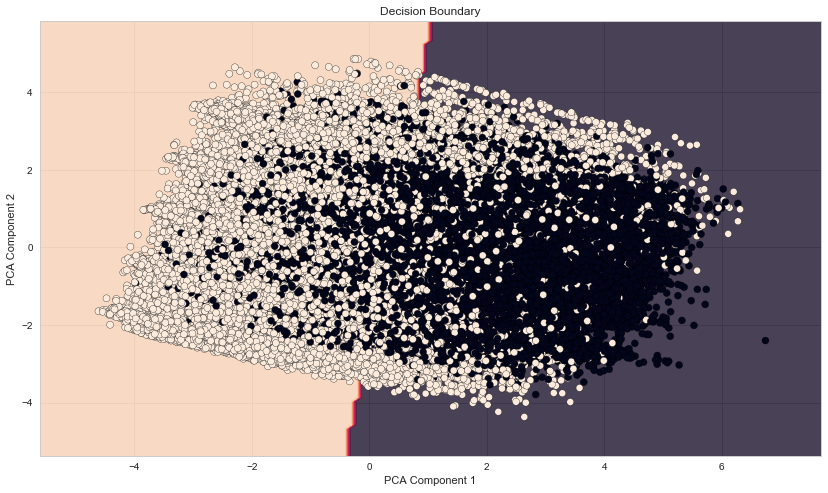

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X_train_2d, y_train, model_2d)

This approach not only aids in visualizing the distribution of customer satisfaction but also provides insights into how well the logistic regression model segregates between different satisfaction levels, thereby enhancing interpretability and model evaluation.

## Model Comparison And Discussion

In this section, the performance of the logistic regression model is compared with two other popular classifiers: Decision Tree and Random Forest. Each model's accuracy and other relevant metrics are evaluated to determine their effectiveness in predicting customer satisfaction.

#### Logistic Regression Model Performance

The logistic regression model was trained earlier using the transformed feature set. Its accuracy and performance metrics were computed as follows:

In [150]:
# Logistic Regression model performance
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

Logistic Regression Accuracy: 0.8294076762684377


#### Decision Tree Model

The Decision Tree classifier is a non-linear model that partitions the feature space into segments to make predictions. It was trained and evaluated as follows:

In [151]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print(f"Decision Tree Accuracy: {tree_accuracy}")

Decision Tree Accuracy: 0.9350915128581357


#### Random Forest Model

The Random Forest classifier, an ensemble of multiple decision trees, was trained and evaluated to leverage the strength of averaging multiple decision trees:

In [152]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_pred)
print(f"Random Forest Accuracy: {forest_accuracy}")

Random Forest Accuracy: 0.9504981079620047


#### Visualizing Model Performances

##### Comparison of Accuracy Scores

A bar chart is used to visually compare the accuracy scores of the logistic regression, decision tree, and random forest models. This helps in understanding which model performs better in terms of overall predictive accuracy.

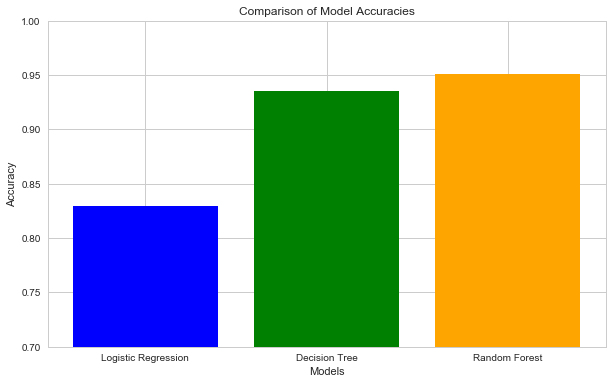

In [153]:
import matplotlib.pyplot as plt

# Bar chart for model comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [logreg_accuracy, tree_accuracy, forest_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.7, 1.0)  # Adjust the y-axis limits for better visualization
plt.show()

##### ROC Curve Comparison

Another effective visualization is the Receiver Operating Characteristic (ROC) curve and Area Under Curve (AUC) score, which demonstrate the trade-off between true positive rate and false positive rate across different classification thresholds. ROC curves for each model can be plotted and compared to determine which model has better discrimination ability.

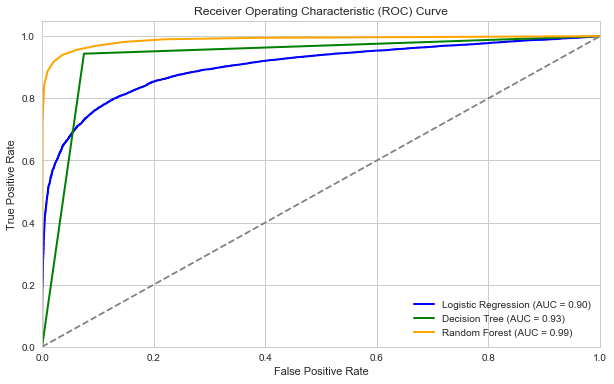

In [156]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each model
plt.figure(figsize=(10, 6))
for model, name, color in zip([logreg, tree_model, forest_model],
                              ['Logistic Regression', 'Decision Tree', 'Random Forest'],
                              ['blue', 'green', 'orange']):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In the model comparison stage, logistic regression, decision tree, and random forest classifiers were evaluated on their ability to predict customer satisfaction based on various features. The logistic regression model achieved an accuracy of 0.8294, while the decision tree and random forest models achieved 0.9351 and 0.9505 respectively. A bar chart illustrates the comparative accuracy of these models, with the random forest model exhibiting the highest accuracy. Additionally, ROC curves depict the discriminatory power of each model, with the random forest model demonstrating superior performance in distinguishing between satisfied and dissatisfied customers.

This ranking suggests that ensemble methods like Random Forests and Decision Trees might be more suitable for predicting customer satisfaction based on the given features compared to Logistic Regression alone.

The Decision Tree and Random Forest models, which are more complex than Logistic Regression, outperformed the simpler Logistic Regression model. This indicates that the additional complexity of ensemble methods, which can capture non-linear relationships and interactions among features, might be beneficial in this predictive task.

The choice of model depends on the specific needs and constraints of the application. If interpretability and simplicity are critical, Logistic Regression provides a reasonable accuracy. However, for maximizing predictive accuracy without sacrificing too much interpretability, the Random Forest model appears to be the most suitable choice in this scenario.

## Conclusion